## 00b: Minimum Finding

In this notebook we're going to learn some ways to find the $x$ value that minimizes a function $f$. This is an important and common task in Machine Learning.

For instance, let's say we were trying to build a function that takes in images and outputs whether the image is of a cat or a dog. We want to find the best function $f$ to distinguish images of cats and dogs. To do this, we could define an *error rate* or *error function* $E$ that takes in the function $f$, where $E(f)$ could be the percentage of wrong guesses the function makes on a previously collected dataset of cat and dog images. Our job is to find the $f$ which *minimizes* the error function.

That is where we are going. But let's start simple and just try to find the minimum values of simple functions to start. Forget about cats and dogs for now.

**Run this for Latex macros.

\\[
\newcommand{\fpartial}[2]{\frac{\partial #1}{\partial #2}}
\\]

From the previous notebook, we saw that the minima of a function $f$ lie at points where $\fpartial{f}{x} = 0$. Let's see an image to remind us of that.

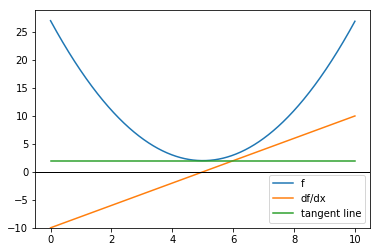

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from lib import utils
import numpy as np

figure = plt.figure()
axes = figure.add_subplot(111)

def f(x_values):
    return (x_values ** 2) - (10 * x_values) + 27
def df(x_values):
    return 2 * (x_values - 5)
def tangent_line(x0, x_values):
    y0 = f(x0)
    delta = (x_values - x0)
    return y0 + delta * df(x0)

x_values = np.arange(1000) / 100
utils.plot(axes, f, x_values, label = "f")
utils.plot(axes, df, x_values, label = "df/dx")
utils.plot(axes, lambda x_values: tangent_line(5, x_values), x_values, label = "tangent line")

axes.set_ylim(bottom = -10)
axes.legend()

For a simple quadratic function it is easy to find the minimum value using some algebra. I can show you:

\\[
f(x) = a x^2 + bx + c
\\
f(x) = \left(\sqrt{a} x + \frac{b}{2\sqrt{a}}\right)^2 + \left(c - \frac{b^2}{4a}\right)
\\]

The process I've just done is called *[completing the square][completing-the-square]*. This shows that minimum is at $-\frac{b}{2\sqrt{a}}$. Let's try it out for our value of $f(x) = x^2 - 10x + 27$:

\\[
-\frac{b}{2\sqrt{a}} = -\frac{-10}{2\sqrt{1}} = 5
\\
f'(x) = 2x - 10
\\
f'(5) = 2\cdot 5 - 10 = 0
\\]

[completing-the-square]: https://en.wikipedia.org/wiki/Completing_the_square

What this shows is that there is an equation to determine the $x$ value that minimizes a quadratic function.

The process of completing the square works for quadratic functions, but it wouldn't work for cubic functions. There is another equation to solve for the minimum of a cubic function. But there are families of functions where there is *no* equation where you can simply plug in the constants of the function and get out a minimum value.

For instance, if $f$ is a polynomial of degree six, there is no general equation to find its minimum. There is a famous theorem called the [Abel-Ruffini theorem][abel-ruffini] which says that there is no equation to factor a polynomial of degree *five* or more. Now, finding the minimum of $f$ is the same as finding a point where $f'(x) = 0$. But $f'$ is a polynomial of degree five. So if we had an equation to find minima of $f$, then that would imply we have an equation to find zeros of $f'$, and Abel-Ruffini says we can't do that.

[abel-ruffini]: https://en.wikipedia.org/wiki/Abel%E2%80%93Ruffini_theorem

The point is this: there are functions where you can't just do algebra to find the minimum values.

Another problem: even when there is an equation, it may be horribly complex.

Last of all, I want a method for finding the minimum of a function that is *generic* and will work for just about any kind of function $f$.

So let's assume that $f(x)$ is easy to calculate, and so is $f'(x)$. However, let's say we don't have a general equation for the minimum of $f$, or that the general equation is hard to calculate. So we want to find the minimum of $f$ using just $f$ and $f'$.

Let's start out with maybe the simplest method. It will work like this:

1. Pick a random starting point $x_0$. Set $i := 0$.
2. If $f'(x_i) < 0$, then increasing $x_i$ a little should decrease $f(x_i)$ a little.
3. Otherwise, if $f'(x_i) > 0$, we should decrease $x_i$ a little to decrease $f(x_i)$ a little.
4. Repeat.

Okay, let's try it!

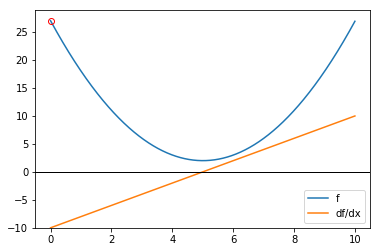

x_i = 0.0


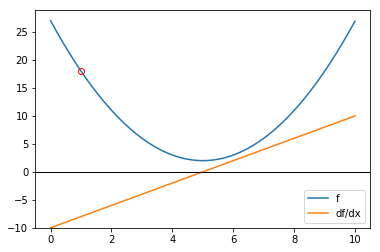

x_i = 1.0


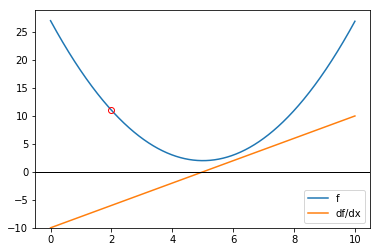

x_i = 2.0


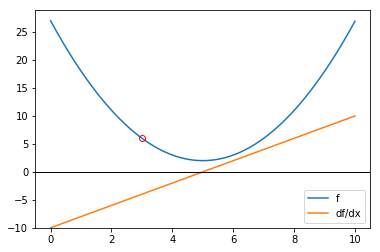

x_i = 3.0


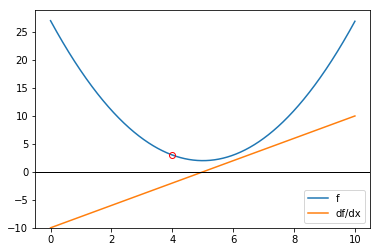

x_i = 4.0


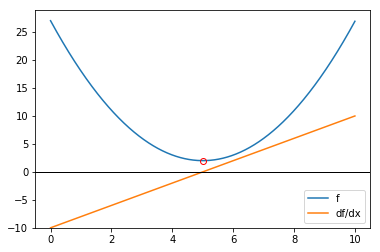

x_i = 5.0


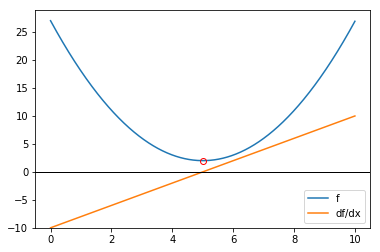

x_i = 5.0


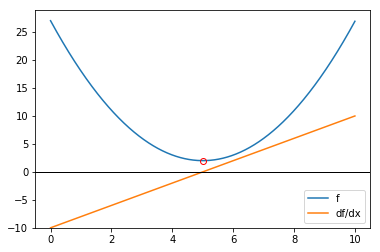

x_i = 5.0


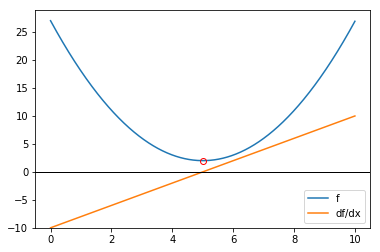

x_i = 5.0


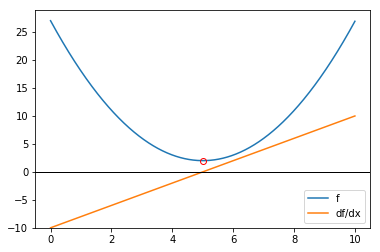

x_i = 5.0


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from lib import utils
import numpy as np

def f(x_values):
    return (x_values ** 2) - (10 * x_values) + 27
def df(x_values):
    return 2 * (x_values - 5)
def tangent_line(x0, x_values):
    y0 = f(x0)
    delta = (x_values - x0)
    return y0 + delta * df(x0)

STEP_SIZE = 1.0

x_i = 0.0
for _ in range(10):
    # Draw plot
    x_values = np.arange(1000) / 100
    figure = plt.figure()
    axes = figure.add_subplot(111)
    utils.plot(axes, f, x_values, label = "f")
    utils.plot(axes, df, x_values, label = "df/dx")
    axes.plot(x_i, f(x_i), 'o', color = 'red', markerfacecolor = 'none')
    axes.set_ylim(bottom = -10)
    axes.legend()
    plt.show()
    print(f"x_i = {x_i}")
    
    if df(x_i) < 0:
        x_i += STEP_SIZE
    elif df(x_i) > 0:
        x_i -= STEP_SIZE


This strategy is called *gradient descent*. We'll see why it's called that later. The basic idea is this: start somewhere randomly, see which way is down by looking at the gradient, step in that direction, and repeat.

Note how I had to set a `STEP_SIZE` variable. I used `STEP_SIZE = 1.0`.

Let's say I change the functions so that they first divide the `x_values` by 100. That stretches out the parabola by a factor of 100. The minimum will now be at $x = 500$.

My choice of `STEP_SIZE = 1.0` will be very poor in this case.

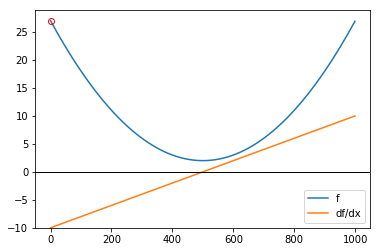

x_i = 0.0


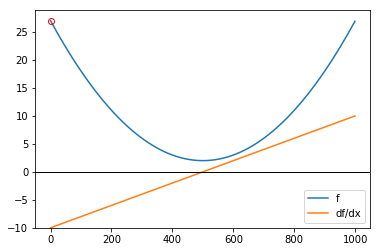

x_i = 1.0


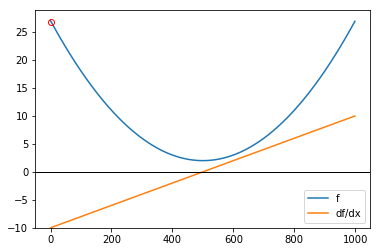

x_i = 2.0


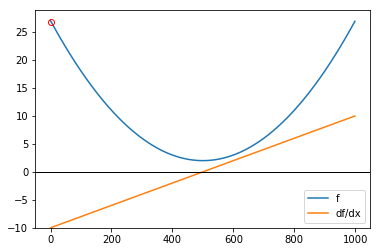

x_i = 3.0


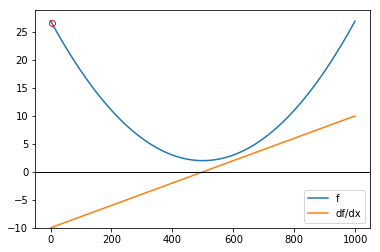

x_i = 4.0


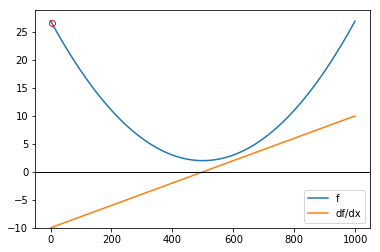

x_i = 5.0


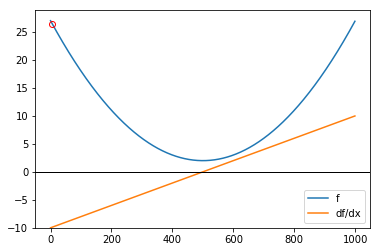

x_i = 6.0


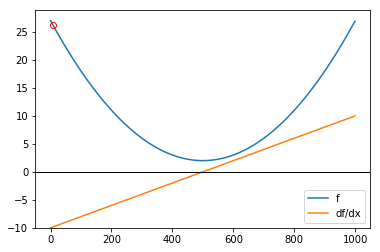

x_i = 7.0


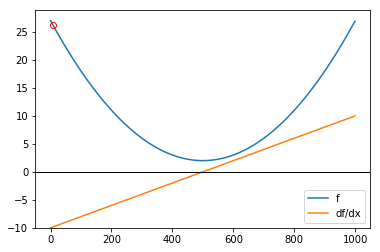

x_i = 8.0


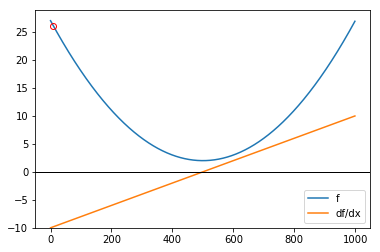

x_i = 9.0


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from lib import utils
import numpy as np

def f(x_values):
    x_values = x_values / 100
    return (x_values ** 2) - (10 * x_values) + 27
def df(x_values):
    x_values = x_values / 100
    return 2 * (x_values - 5)

STEP_SIZE = 1.0

x_i = 0.0
for _ in range(10):
    # Draw plot
    x_values = np.arange(1000)
    figure = plt.figure()
    axes = figure.add_subplot(111)
    utils.plot(axes, f, x_values, label = "f")
    utils.plot(axes, df, x_values, label = "df/dx")
    axes.plot(x_i, f(x_i), 'o', color = 'red', markerfacecolor = 'none')
    axes.set_ylim(bottom = -10)
    axes.legend()
    plt.show()
    print(f"x_i = {x_i}")

    if df(x_i) < 0:
        x_i += STEP_SIZE
    elif df(x_i) > 0:
        x_i -= STEP_SIZE


As you can see, after ten steps we've made basically no progress. Let's increase `STEP_SIZE = 100`. But let me *also* change the starting $x_i$ value to 50. Let's see what happens.

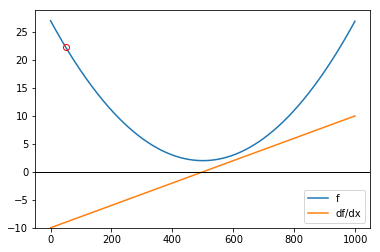

x_i = 50.0


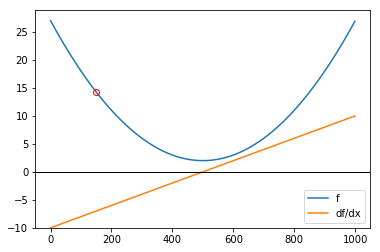

x_i = 150.0


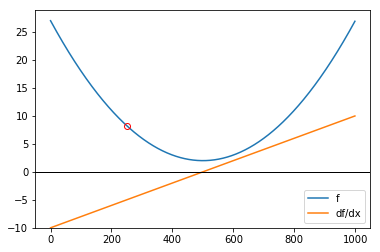

x_i = 250.0


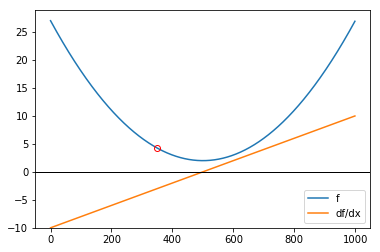

x_i = 350.0


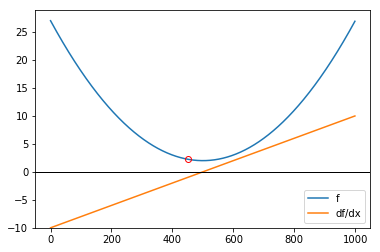

x_i = 450.0


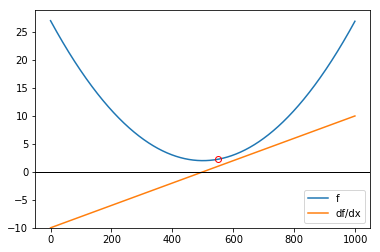

x_i = 550.0


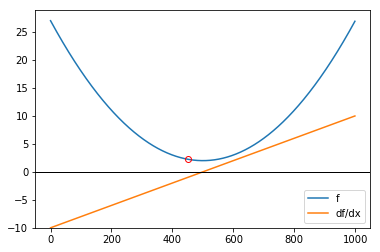

x_i = 450.0


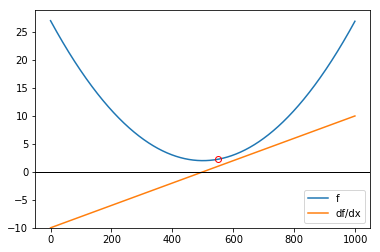

x_i = 550.0


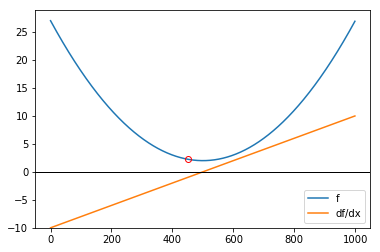

x_i = 450.0


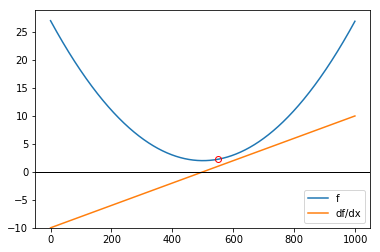

x_i = 550.0


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from lib import utils
import numpy as np

def f(x_values):
    x_values = x_values / 100
    return (x_values ** 2) - (10 * x_values) + 27
def df(x_values):
    x_values = x_values / 100
    return 2 * (x_values - 5)

STEP_SIZE = 100.0

x_i = 50.0
for _ in range(10):
    # Draw plot
    x_values = np.arange(1000)
    figure = plt.figure()
    axes = figure.add_subplot(111)
    utils.plot(axes, f, x_values, label = "f")
    utils.plot(axes, df, x_values, label = "df/dx")
    axes.plot(x_i, f(x_i), 'o', color = 'red', markerfacecolor = 'none')
    axes.set_ylim(bottom = -10)
    axes.legend()
    plt.show()
    print(f"x_i = {x_i}")

    if df(x_i) < 0:
        x_i += STEP_SIZE
    elif df(x_i) > 0:
        x_i -= STEP_SIZE


We never get that close to the true minimum of $x = 500$, we keep bouncing between $x = 450$ and $x = 550$.

What we want to do is take *smaller* steps as we get closer to the minimum. What's the easiest way to do this?

Well, note that the derivative is zero at the minimum. So one good idea is to take bigger steps when the magnitude of the gradient is large, and smaller steps when the magnitude is small.

To do this, we'll replace `STEP_SIZE` with a constant called `LEARNING_RATE`. To decide how much to move each time, we'll multiply the magnitude of the derivative by `LEARNING_RATE`.

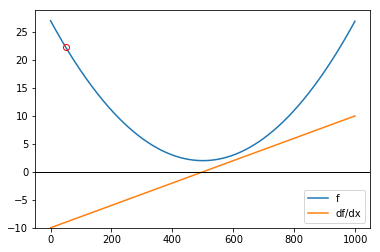

x_i = 50.0


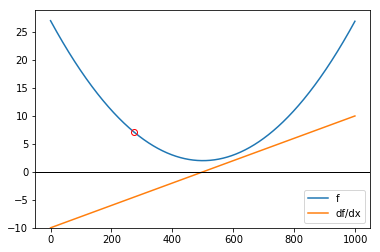

x_i = 275.0


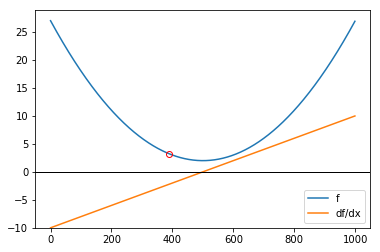

x_i = 387.5


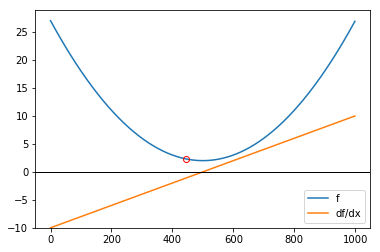

x_i = 443.75


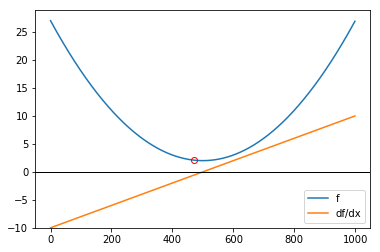

x_i = 471.875


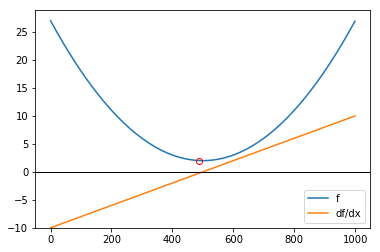

x_i = 485.9375


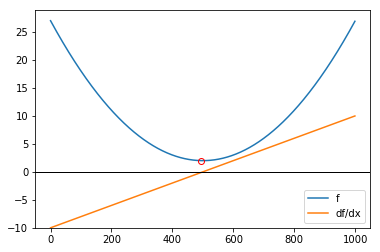

x_i = 492.96875


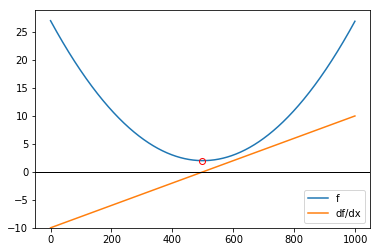

x_i = 496.484375


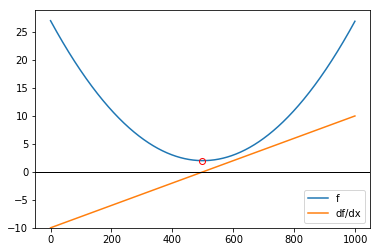

x_i = 498.2421875


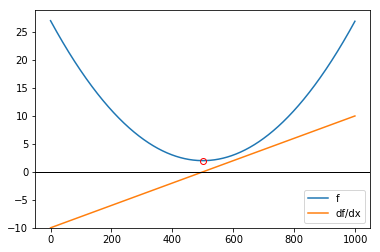

x_i = 499.12109375


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from lib import utils
import numpy as np

def f(x_values):
    x_values = x_values / 100
    return (x_values ** 2) - (10 * x_values) + 27
def df(x_values):
    x_values = x_values / 100
    return 2 * (x_values - 5)

LEARNING_RATE = 25.0

x_i = 50.0
for _ in range(10):
    # Draw plot
    x_values = np.arange(1000)
    figure = plt.figure()
    axes = figure.add_subplot(111)
    utils.plot(axes, f, x_values, label = "f")
    utils.plot(axes, df, x_values, label = "df/dx")
    axes.plot(x_i, f(x_i), 'o', color = 'red', markerfacecolor = 'none')
    axes.set_ylim(bottom = -10)
    axes.legend()
    plt.show()
    print(f"x_i = {x_i}")

    if df(x_i) < 0:
        x_i += LEARNING_RATE * np.abs(df(x_i))
    elif df(x_i) > 0:
        x_i -= LEARNING_RATE * np.abs(df(x_i))


That worked a lot better!

How do we know how to set this `LEARNING_RATE` variable? Well, we often have to randomly try out a few values to see what works well. For instance, if I chose `LEARNING_RATE = 1.0`. I would see that the error decreases too slowly to be useful.

On the other hand, if the learning rate is too great, I can actually jump *past* the minimum. Here I'll start close at $x = 450$ and set `LEARNING_RATE = 200`.

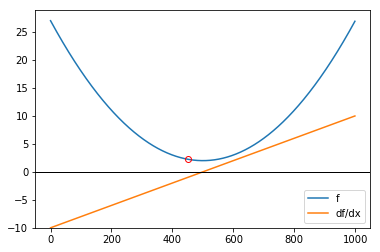

x_i = 450.0


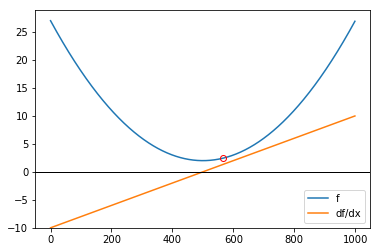

x_i = 565.0


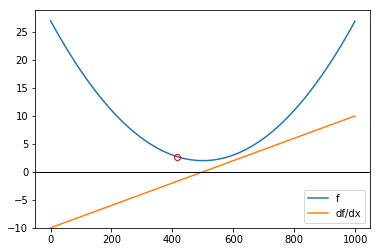

x_i = 415.4999999999999


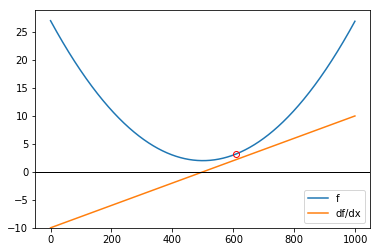

x_i = 609.8500000000003


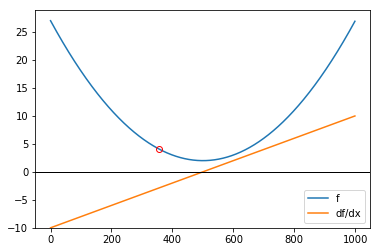

x_i = 357.1949999999997


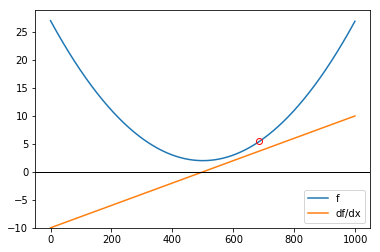

x_i = 685.6465000000004


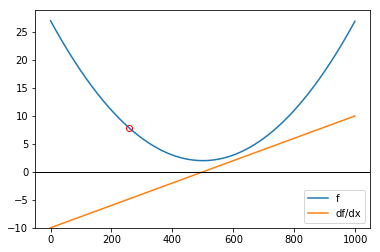

x_i = 258.65954999999957


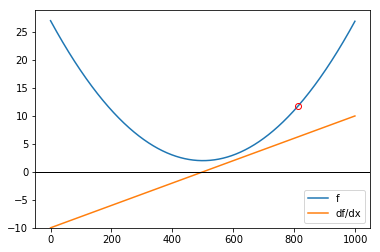

x_i = 813.7425850000006


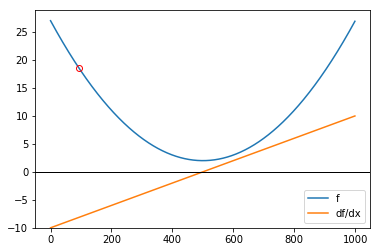

x_i = 92.13463949999914


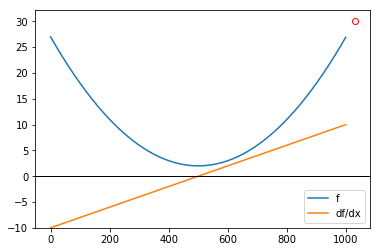

x_i = 1030.224968650001


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from lib import utils
import numpy as np

def f(x_values):
    x_values = x_values / 100
    return (x_values ** 2) - (10 * x_values) + 27
def df(x_values):
    x_values = x_values / 100
    return 2 * (x_values - 5)

LEARNING_RATE = 115.0

x_i = 450.0
for _ in range(10):
    # Draw plot
    x_values = np.arange(1000)
    figure = plt.figure()
    axes = figure.add_subplot(111)
    utils.plot(axes, f, x_values, label = "f")
    utils.plot(axes, df, x_values, label = "df/dx")
    axes.plot(x_i, f(x_i), 'o', color = 'red', markerfacecolor = 'none')
    axes.set_ylim(bottom = -10)
    axes.legend()
    plt.show()
    print(f"x_i = {x_i}")

    if df(x_i) < 0:
        x_i += LEARNING_RATE * np.abs(df(x_i))
    elif df(x_i) > 0:
        x_i -= LEARNING_RATE * np.abs(df(x_i))


You can see things got worse and worse as we continued. When the learning rate is set to high, gradient descent can *diverge* and get further and further away.